In [1]:
from nhanes.load import load_NHANES_data, load_NHANES_metadata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nhanes_data = load_NHANES_data()

In [3]:
smoking_keys = [x for x in nhanes_data.keys() if "SMOKING" in x.upper()]
smoking_keys

['AgeStartedSmokingCigarettesRegularly',
 'TriedToQuitSmoking',
 'TimesStoppedSmokingCigarettes',
 'HowLongWereYouAbleToStopSmoking']

In [6]:
nhanes_data.HowHealthyIsTheDiet.unique()

array([nan, 'Good', 'Very good', 'Excellent', 'Fair', 'Poor'],
      dtype=object)

In [7]:
bmi_health_data = nhanes_data[['HowHealthyIsTheDiet', 'BodyMassIndexKgm2']]
bmi_health_data = bmi_health_data.dropna()
bmi_health_data.head()

,HowHealthyIsTheDiet,BodyMassIndexKgm2
SEQN,,
93705.0,Good,31.7
93706.0,Very good,21.5
93708.0,Excellent,23.7
93709.0,Good,38.9
93711.0,Very good,21.3


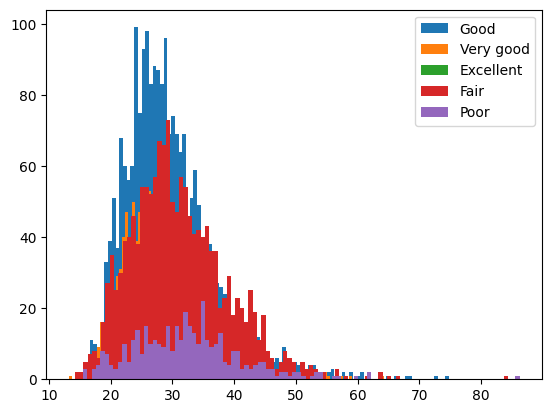

In [10]:
diet_values = list(bmi_health_data.HowHealthyIsTheDiet.unique())
for d_val in diet_values:
    plt.hist(bmi_health_data[bmi_health_data.HowHealthyIsTheDiet == d_val].BodyMassIndexKgm2, bins=100, label=d_val)
plt.legend(loc='upper right')
plt.show()

In [11]:
def cohen_d_2_groups(group1, group2) -> float:
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    n1 = len(group1) - 1
    n2 = len(group2) - 1
    s = np.sqrt((n1 * std1 * std1 + n2*std2*std2)/(n1 + n2))
    return np.abs(mean1 - mean2) / s

In [16]:
d_groups = np.zeros((len(diet_values), len(diet_values)))
for i, d_val in enumerate(diet_values):
    ref_vals = bmi_health_data[bmi_health_data.HowHealthyIsTheDiet == d_val].BodyMassIndexKgm2
    for j, d_val_2 in enumerate(diet_values):
        group_vals = bmi_health_data[bmi_health_data.HowHealthyIsTheDiet == d_val_2].BodyMassIndexKgm2
        d_groups[i][j] = cohen_d_2_groups(ref_vals, group_vals)

In [17]:
import seaborn as sns

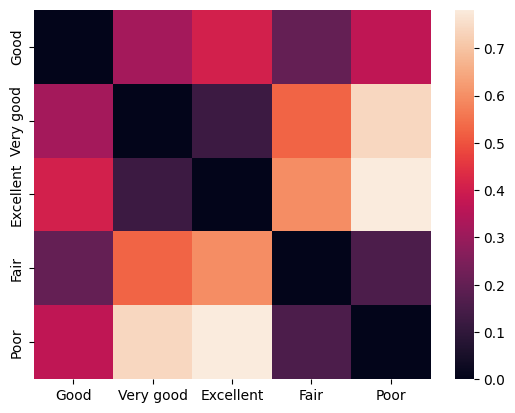

In [19]:
sns.heatmap(d_groups, xticklabels=diet_values, yticklabels=diet_values)
plt.show()